### Variate Autoregression Model 

In [3]:

import pandas as pd
from statsmodels.tsa.api import VAR
import os
from dotenv import load_dotenv
import yfinance as yf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
# Load environment variables from the .env file
load_dotenv('../.env');

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler


import numpy as np

In [4]:
# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_symbols = tickers['Symbol'].tolist()

# And the company name
sp500_names = tickers['Security'].tolist()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty list to store DataFrames for each stock
company_list = []

# Download data for each stock and add a 'company_name' column
for stock, com_name in zip(sp500_symbols, sp500_names):
    df = yf.download(stock, start, end)
    df['company_name'] = com_name
    company_list.append(df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(company_list, axis=0)

df.tail(100)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-15 00:00:00 -> 2023-12-15 14:16:10.182961)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

/var/folders/mf/27g8bmj10ylbpz1wpw3grsfc0000gn/T/ipykernel_73245/3368134996.py:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(company_list, axis=0)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-26,189.389999,192.889999,188.169998,192.000000,191.541397,2922500.0,Zoetis
2023-07-27,192.800003,194.990005,188.479996,188.690002,188.239304,2173400.0,Zoetis
2023-07-28,190.500000,191.279999,187.860001,189.899994,189.446411,1899800.0,Zoetis
2023-07-31,189.179993,190.089996,186.440002,188.089996,187.640732,1500800.0,Zoetis
2023-08-01,187.460007,188.770004,184.789993,185.509995,185.066895,1535300.0,Zoetis
...,...,...,...,...,...,...,...
2023-12-08,182.080002,184.850006,181.470001,184.600006,184.600006,1474600.0,Zoetis
2023-12-11,185.169998,190.149994,184.679993,189.460007,189.460007,3199200.0,Zoetis
2023-12-12,190.080002,192.500000,188.919998,191.470001,191.470001,1899700.0,Zoetis


In [5]:

# Get the list of tickers for the S&P 500

# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_tickers = tickers['Symbol'].tolist()

In [6]:
# Download historical data for each stock
stock_data = yf.download(sp500_tickers, start='2005-01-01', end='2023-01-01', progress=False)

# Extract the closing prices and create a new DataFrame
closing_prices = stock_data['Adj Close']

# Create a MultiIndex with dates and tickers
closing_prices.columns = pd.MultiIndex.from_product([closing_prices.columns, ['Close']])

# Display the resulting DataFrame
closing_prices.head()


4 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2023-01-01)')
['VLTO', 'KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1104555600, endDate = 1672549200")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512988,NaN,0.958030,NaN,NaN,14.365732,4.233333,18.995512,30.838949,23.200199,...,35.891029,8.957227,26.668758,24.465845,NaN,11.864742,69.819244,55.509998,48.117657,NaN
2005-01-04 00:00:00,14.130102,NaN,0.967869,NaN,NaN,14.221063,4.177778,18.548899,30.024111,22.569038,...,35.814369,8.823016,26.487741,24.267958,NaN,11.707623,69.792870,54.470001,47.460777,NaN
2005-01-05 00:00:00,14.124027,NaN,0.976345,NaN,NaN,14.057929,4.153333,18.476858,29.859142,22.671032,...,36.219555,8.723605,26.349308,23.982145,NaN,11.679754,69.247543,52.570000,47.289387,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977103,NaN,NaN,14.374967,4.147778,18.311186,29.364239,22.632788,...,37.686951,8.708694,26.684738,24.096476,NaN,11.811525,70.047951,52.650002,47.560715,NaN
2005-01-07 00:00:00,13.801919,NaN,1.048247,NaN,NaN,14.621222,4.191111,19.168394,29.384233,22.664667,...,36.433086,8.658985,26.509048,23.911802,NaN,11.745644,69.924812,53.099998,46.404022,NaN


In [7]:
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4531 entries, 2005-01-03 00:00:00 to 2022-12-30 00:00:00
Columns: 503 entries, ('A', 'Close') to ('ZTS', 'Close')
dtypes: float64(503)
memory usage: 17.4+ MB


In [8]:
closing_prices.describe()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
count,4531.000000,4346.000000,4531.000000,2518.000000,518.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,...,4531.000000,4531.000000,4531.000000,4531.000000,2823.000000,4531.000000,4531.000000,4531.000000,4531.000000,2497.000000
mean,48.448794,24.411172,36.424995,67.152163,146.422568,43.033643,20.419887,99.804115,143.939038,57.838992,...,86.942125,29.423454,52.142977,40.256212,56.365921,50.791100,85.736242,118.573308,33.597528,89.944939
std,38.021691,15.226563,45.361764,32.997960,31.584883,32.539582,13.123476,88.428409,162.333301,44.493792,...,40.807460,19.175404,13.558789,11.521050,29.439899,33.773974,31.740740,134.141466,15.812926,56.585396
min,8.023996,1.659225,0.958030,21.519720,82.489998,11.856325,4.078889,15.465819,15.980000,10.995413,...,9.439811,8.338987,25.885141,19.614279,19.548439,11.458580,28.260178,16.450001,5.134857,26.500345
25%,22.004000,10.372512,5.530655,41.928801,116.712500,18.159927,7.894444,29.679858,33.549999,23.640976,...,56.660452,12.651336,41.584858,30.905017,31.396735,19.521839,58.178318,36.720001,20.024180,42.772072
50%,33.903702,21.469999,18.400408,61.513855,150.510002,31.388962,18.343332,66.755608,59.080002,39.247864,...,84.909950,21.677038,53.144970,37.733372,48.811939,42.830479,82.544594,51.700001,30.951420,71.059258
75%,64.691982,37.807460,41.923759,82.178442,169.985004,57.459461,30.340000,146.033821,238.320000,81.730267,...,112.810669,41.318052,59.671358,50.018383,75.770729,75.110077,110.596359,151.745003,47.290472,139.289032
max,176.669464,59.345573,179.953888,163.539825,216.839996,136.396820,63.619999,403.419495,688.369995,181.135345,...,211.408630,74.477821,110.410355,66.997948,134.216309,133.725128,170.146317,614.549988,68.870659,243.014023


In [9]:
closing_prices.columns

MultiIndex([(   'A', 'Close'),
            ( 'AAL', 'Close'),
            ('AAPL', 'Close'),
            ('ABBV', 'Close'),
            ('ABNB', 'Close'),
            ( 'ABT', 'Close'),
            ('ACGL', 'Close'),
            ( 'ACN', 'Close'),
            ('ADBE', 'Close'),
            ( 'ADI', 'Close'),
            ...
            ('WYNN', 'Close'),
            ( 'XEL', 'Close'),
            ( 'XOM', 'Close'),
            ('XRAY', 'Close'),
            ( 'XYL', 'Close'),
            ( 'YUM', 'Close'),
            ( 'ZBH', 'Close'),
            ('ZBRA', 'Close'),
            ('ZION', 'Close'),
            ( 'ZTS', 'Close')],
           length=503)

In [10]:
closing_prices.columns = closing_prices.columns.map(lambda x: x[0])

In [11]:
closing_prices.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512988,NaN,0.958030,NaN,NaN,14.365732,4.233333,18.995512,30.838949,23.200199,...,35.891029,8.957227,26.668758,24.465845,NaN,11.864742,69.819244,55.509998,48.117657,NaN
2005-01-04 00:00:00,14.130102,NaN,0.967869,NaN,NaN,14.221063,4.177778,18.548899,30.024111,22.569038,...,35.814369,8.823016,26.487741,24.267958,NaN,11.707623,69.792870,54.470001,47.460777,NaN
2005-01-05 00:00:00,14.124027,NaN,0.976345,NaN,NaN,14.057929,4.153333,18.476858,29.859142,22.671032,...,36.219555,8.723605,26.349308,23.982145,NaN,11.679754,69.247543,52.570000,47.289387,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977103,NaN,NaN,14.374967,4.147778,18.311186,29.364239,22.632788,...,37.686951,8.708694,26.684738,24.096476,NaN,11.811525,70.047951,52.650002,47.560715,NaN
2005-01-07 00:00:00,13.801919,NaN,1.048247,NaN,NaN,14.621222,4.191111,19.168394,29.384233,22.664667,...,36.433086,8.658985,26.509048,23.911802,NaN,11.745644,69.924812,53.099998,46.404022,NaN


In [13]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [14]:
column_names_list = list(closing_prices.columns)

In [15]:
column_names_list 

['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT

In [16]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [ ]:
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
# results = model.fit()

# Get the lag order
# lag_order = results.k_ar

## Make predictions
# predictions = results.forecast(closing_prices.values[-lag_order:], steps=your_steps)

# # Create a DataFrame with the predicted values
# predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
# forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=10)

# # Set the index of the predictions DataFrame
# predictions_df.index = forecast_dates

# # Display the predictions DataFrame
# print(predictions_df)

In [17]:
closing_prices.isna().sum().sum()

187517

In [18]:
closing_prices.interpolate(axis=1, method='linear', inplace=True)

/var/folders/mf/27g8bmj10ylbpz1wpw3grsfc0000gn/T/ipykernel_73245/1342120467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.interpolate(axis=1, method='linear', inplace=True)


In [19]:
closing_prices.isna().sum().sum()

0

In [22]:
# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
results = model.fit()

# Get the lag order
lag_order = results.k_ar

## Make predictions
predictions = results.forecast(closing_prices.values[-lag_order:], steps=30)

# # Create a DataFrame with the predicted values
predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=30)

# # Set the index of the predictions DataFrame
predictions_df.index = forecast_dates

# # Display the predictions DataFrame
print(predictions_df)

/Users/fauzanarif/Bootcamp/ds-capstone/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       A           AAL          AAPL          ABBV  \
2022-12-31  1.474065e+02  1.233563e+01  1.275736e+02  1.550237e+02   
2023-01-01 -3.220978e+04 -2.767074e+03 -2.897311e+04 -1.917448e+04   
2023-01-02  6.605274e+04  5.601084e+03  5.674764e+04  4.165598e+04   
2023-01-03 -4.407125e+07 -3.784616e+06 -3.963515e+07 -2.633131e+07   
2023-01-04  5.267740e+07  4.425991e+06  4.376917e+07  3.436819e+07   
2023-01-05 -2.580596e+10 -2.215441e+09 -2.321103e+10 -1.541874e+10   
2023-01-06  3.362660e+10  2.831159e+09  2.812922e+10  2.178583e+10   
2023-01-07 -3.777780e+13 -3.244264e+12 -3.397675e+13 -2.256975e+13   
2023-01-08 -3.497168e+12 -3.845981e+11 -6.239837e+12  3.964390e+11   
2023-01-09 -3.682249e+16 -3.161998e+15 -3.312245e+16 -2.199635e+16   
2023-01-10 -4.978820e+16 -4.357323e+15 -4.780076e+16 -2.731927e+16   
2023-01-11 -6.102782e+19 -5.241268e+18 -5.489526e+19 -3.645336e+19   
2023-01-12 -1.098998e+20 -9.573642e+18 -1.038531e+20 -6.163553e+19   
2023-01-13 -3.281654

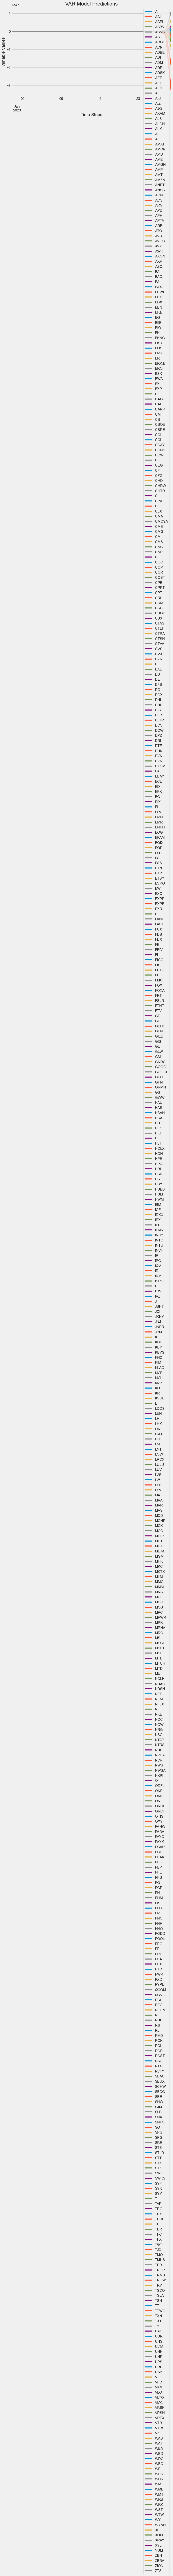

In [23]:
import matplotlib.pyplot as plt

# Assuming predictions_df is your DataFrame with predictions
predictions_df.plot(figsize=(10, 6))
plt.title('VAR Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Variable Values')
plt.legend(loc='upper right')
plt.show()